In [1]:
from __future__ import division, print_function
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, vstack, hstack
import fitsio
import sys, os, glob, time, warnings, gc

In [ ]:
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'figure.facecolor':'w'} 
plt.rcParams.update(params)

In [54]:
def plot_cutout(img, pixscale, vmin=-1, vmax=1, unit='arcsec'):
    if unit=='arcsec':
        extent = 0.5*pixscale*img.shape[0]*np.array([-1, 1, -1, 1])
    elif unit=='arcmin':
        extent = 0.5*pixscale*img.shape[0]*np.array([-1, 1, -1, 1])/60.
    elif unit=='deg':
        extent = 0.5*pixscale*img.shape[0]*np.array([-1, 1, -1, 1])/3600.
    else:
        raise ValueError('unrecognized unit')
    fig, ax = plt.subplots(figsize=(8, 8))
    dens = ax.imshow(img, aspect='equal', 
               cmap='seismic', extent=extent, vmin=vmin, vmax=vmax)
    ax.axvline(0, ls='--', lw=0.5, color='grey')
    ax.axhline(0, ls='--', lw=0.5, color='grey')
    fig.colorbar(dens, fraction=0.046, pad=0.04)
    # plt.grid(alpha=0.5, lw=0.5)
    return ax

In [13]:
gaia_fn = 'gaia1_10_17.fits.gz'
gaia = Table.read('/global/homes/r/rongpu/temp/gaia_cutouts/'+gaia_fn)

In [14]:
# Remove duplicates
gaia.sort('SOURCE_ID')
mask = gaia['SOURCE_ID'][1:]==gaia['SOURCE_ID'][:-1]
mask = np.concatenate([[False], mask])
gaia = gaia[~mask]

In [15]:
print(len(gaia))
print(len(np.unique(gaia['SOURCE_ID'])))

4955
4955


In [16]:
gaia[:3]

SOURCE_ID,RA,RA_ERROR,DEC,DEC_ERROR,PARALLAX,PARALLAX_ERROR,PMRA,PMRA_ERROR,PMDEC,PMDEC_ERROR,ASTROMETRIC_EXCESS_NOISE,PHOT_G_MEAN_MAG,BP_RP,RADIAL_VELOCITY,RADIAL_VELOCITY_ERROR,PHOT_VARIABLE_FLAG,TEFF_VAL,A_G_VAL
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float64,float64,str13,float32,float32
72452632245539072,32.9942114638,0.0363048679756,11.0301229111,0.0257234719045,3.53011464504,0.0368095529962,46.8384882795,0.068566428767,-50.5131064023,0.0570737073526,0.0,10.1898,1.27333,-22.2854048961,0.29568301458,NOT_AVAILABLE,4688.23,nan
73218579533216256,32.3637293175,0.0321039330722,11.3944459371,0.0263367382172,1.68159893551,0.0359192141584,0.988633141189,0.064255816694,-6.5136162609,0.0542504316355,0.0,13.8629,1.12293,nan,nan,NOT_AVAILABLE,4994.0,0.7545
73271253012097280,32.1316143397,0.032818924492,11.5288175459,0.0260762168308,0.822077706725,0.0340873332104,14.2181022943,0.0666826206643,-6.31515803277,0.057138648128,0.0,11.2335,1.44077,27.8670515737,0.26400663042,NOT_AVAILABLE,4470.39,0.4787


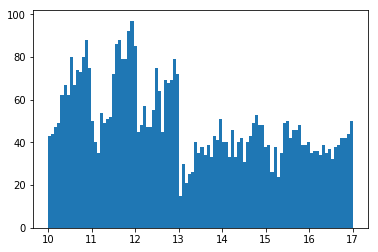

In [17]:
plt.hist(gaia['PHOT_G_MEAN_MAG'], 100);

wget -O /global/homes/r/rongpu/temp/gaia_cutouts/gaia1_10_17/gaia_2.fits "http://legacysurvey.org/viewer/cutout.fits?ra=32.131614&dec=11.528818&layer=dr8-resid&pixscale=0.262&bands=g"
PHOT_G_MEAN_MAG =  11.2335


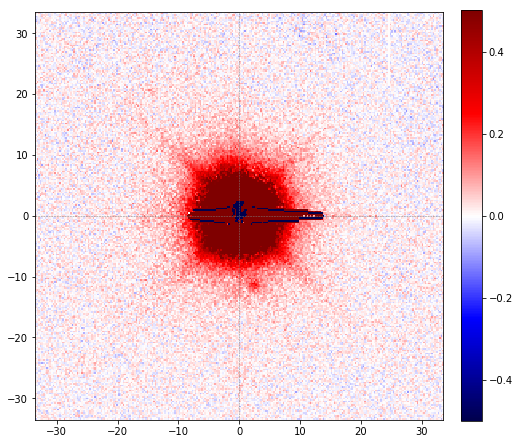

In [45]:
index = 2
band = 'g'
img_type = 'resid'
pixscale = '0.262'

ra, dec = gaia['RA'][index], gaia['DEC'][index]

download_dir = '/global/homes/r/rongpu/temp/gaia_cutouts/'
file_path = os.path.join(download_dir, gaia_fn[:-8], 'gaia_{}.fits'.format(index))

url = 'http://legacysurvey.org/viewer/cutout.fits?ra={:f}&dec={:f}&layer=dr8-{}&pixscale={}&bands={}'.format(ra, dec, img_type, pixscale, band)
cmd = 'wget -O '+file_path+' \"'+url+'\"'

print(cmd)
os.system(cmd)

#####################################################################

print('PHOT_G_MEAN_MAG = ', gaia['PHOT_G_MEAN_MAG'][index])

img_raw = fitsio.read(file_path)
img = img_raw / (float(pixscale)**2)

#####################################################################

vrange = 0.5
plot_cutout(img, float(pixscale), vmin=-vrange, vmax=vrange)
plt.show()

wget -O /global/homes/r/rongpu/temp/gaia_cutouts/gaia1_10_17/gaia_20.fits "http://legacysurvey.org/viewer/cutout.fits?ra=30.795463&dec=13.136143&layer=dr8-resid&pixscale=0.262&bands=g"
PHOT_G_MEAN_MAG =  14.8091


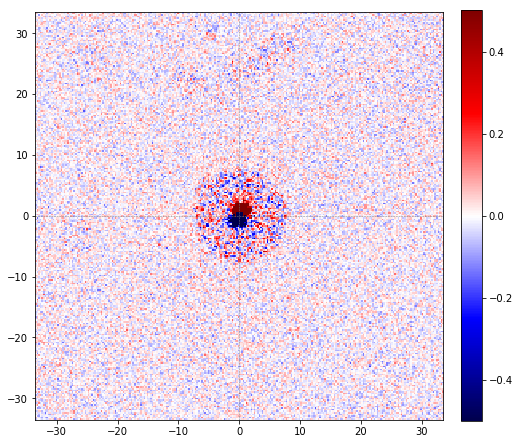

In [46]:
index = 20
band = 'g'
img_type = 'resid'
pixscale = '0.262'

ra, dec = gaia['RA'][index], gaia['DEC'][index]

download_dir = '/global/homes/r/rongpu/temp/gaia_cutouts/'
file_path = os.path.join(download_dir, gaia_fn[:-8], 'gaia_{}.fits'.format(index))

url = 'http://legacysurvey.org/viewer/cutout.fits?ra={:f}&dec={:f}&layer=dr8-{}&pixscale={}&bands={}'.format(ra, dec, img_type, pixscale, band)
cmd = 'wget -O '+file_path+' \"'+url+'\"'

print(cmd)
os.system(cmd)

#####################################################################

print('PHOT_G_MEAN_MAG = ', gaia['PHOT_G_MEAN_MAG'][index])

img_raw = fitsio.read(file_path)
img = img_raw / (float(pixscale)**2)

#####################################################################

vrange = 0.5
plot_cutout(img, float(pixscale), vmin=-vrange, vmax=vrange)
plt.show()

wget -O /global/homes/r/rongpu/temp/gaia_cutouts/gaia1_10_17/gaia_200.fits "http://legacysurvey.org/viewer/cutout.fits?ra=28.689216&dec=18.126448&layer=dr8-resid&pixscale=0.262&bands=g"
PHOT_G_MEAN_MAG =  12.9126


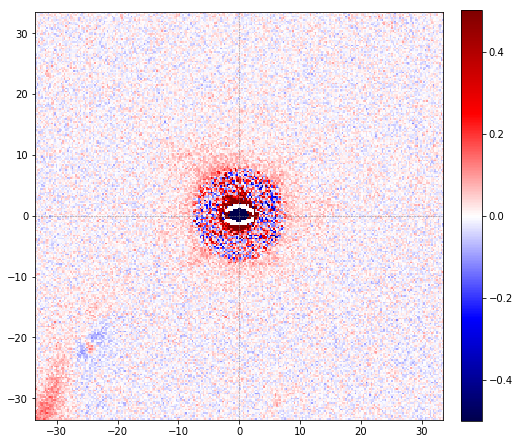

In [47]:
index = 200
band = 'g'
img_type = 'resid'
pixscale = '0.262'

ra, dec = gaia['RA'][index], gaia['DEC'][index]

download_dir = '/global/homes/r/rongpu/temp/gaia_cutouts/'
file_path = os.path.join(download_dir, gaia_fn[:-8], 'gaia_{}.fits'.format(index))

url = 'http://legacysurvey.org/viewer/cutout.fits?ra={:f}&dec={:f}&layer=dr8-{}&pixscale={}&bands={}'.format(ra, dec, img_type, pixscale, band)
cmd = 'wget -O '+file_path+' \"'+url+'\"'

print(cmd)
os.system(cmd)

#####################################################################

print('PHOT_G_MEAN_MAG = ', gaia['PHOT_G_MEAN_MAG'][index])

img_raw = fitsio.read(file_path)
img = img_raw / (float(pixscale)**2)

#####################################################################

vrange = 0.5
plot_cutout(img, float(pixscale), vmin=-vrange, vmax=vrange)
plt.show()

wget -O /global/homes/r/rongpu/temp/gaia_cutouts/gaia1_10_17/gaia_201.fits "http://legacysurvey.org/viewer/cutout.fits?ra=27.870318&dec=18.342381&layer=dr8-resid&pixscale=0.262&bands=g"
PHOT_G_MEAN_MAG =  10.1219


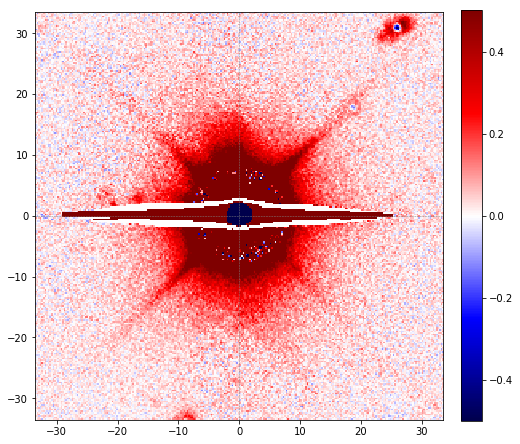

In [48]:
index = 201
band = 'g'
img_type = 'resid'
pixscale = '0.262'

ra, dec = gaia['RA'][index], gaia['DEC'][index]

download_dir = '/global/homes/r/rongpu/temp/gaia_cutouts/'
file_path = os.path.join(download_dir, gaia_fn[:-8], 'gaia_{}.fits'.format(index))

url = 'http://legacysurvey.org/viewer/cutout.fits?ra={:f}&dec={:f}&layer=dr8-{}&pixscale={}&bands={}'.format(ra, dec, img_type, pixscale, band)
cmd = 'wget -O '+file_path+' \"'+url+'\"'

print(cmd)
os.system(cmd)

#####################################################################

print('PHOT_G_MEAN_MAG = ', gaia['PHOT_G_MEAN_MAG'][index])

img_raw = fitsio.read(file_path)
img = img_raw / (float(pixscale)**2)

#####################################################################

vrange = 0.5
plot_cutout(img, float(pixscale), vmin=-vrange, vmax=vrange)
plt.show()